In [2]:
import pandas as pd

# Load your data
df = pd.read_csv(
    "all-members-of-the-class-Pathways_33_orgs.csv", sep='\t'
)

In [3]:
df.head(5)

,Organism,Pathway Name,#Reactions,Evidence
0,GCF_000014005,PWY-6620,2,EV-COMP-AINF
1,GCF_000014005,ILEUSYN-PWY,7,EV-COMP-AINF
2,GCF_000014005,PWY0-1329,2,EV-COMP-AINF
3,GCF_000014005,PWY-8073,6,EV-COMP-AINF
4,GCF_000014005,PWY-5481,1,EV-COMP-AINF


In [4]:
len(df)

7012

In [5]:
duplicates = df[df.duplicated(subset=df.columns[1], keep=False)]
duplicates_sorted = duplicates.sort_values(by=duplicates.columns[1])

In [6]:
print(duplicates_sorted)

           Organism         Pathway Name  #Reactions      Evidence
4009  GCF_000745965  12DICHLORETHDEG-PWY           4  EV-COMP-AINF
5344  GCF_008000815  12DICHLORETHDEG-PWY           4  EV-COMP-AINF
5657  GCF_014203275  12DICHLORETHDEG-PWY           4  EV-COMP-AINF
5107  GCF_003330725  12DICHLORETHDEG-PWY           4  EV-COMP-AINF
898   GCF_000178955           1CMET2-PWY           9  EV-COMP-AINF
...             ...                  ...         ...           ...
3392  GCF_000688455           XYLCAT-PWY           2  EV-COMP-AINF
5204  GCF_003330725           XYLCAT-PWY           2  EV-COMP-AINF
1144  GCF_000178975           XYLCAT-PWY           2  EV-COMP-AINF
576   GCF_000022565           XYLCAT-PWY           2  EV-COMP-AINF
402   GCF_000014905           XYLCAT-PWY           2  EV-COMP-AINF

[6933 rows x 4 columns]


In [7]:
grouped = duplicates_sorted.groupby(duplicates_sorted.columns[1])[duplicates_sorted.columns[0]].apply(list).reset_index()

# Convert DataFrame to dictionary
results = grouped.rename(columns={grouped.columns[0]: 'name', grouped.columns[1]: 'orgs'}).to_dict('records')

In [8]:
len(pd.unique(df["Pathway Name"]))

476

In [9]:
list(map(lambda x: len(x['orgs']), results))

[4,
 29,
 2,
 17,
 18,
 17,
 5,
 24,
 27,
 3,
 23,
 2,
 2,
 12,
 27,
 33,
 22,
 19,
 19,
 30,
 16,
 29,
 29,
 2,
 25,
 31,
 32,
 29,
 31,
 2,
 2,
 27,
 33,
 5,
 21,
 2,
 8,
 12,
 6,
 29,
 26,
 2,
 2,
 15,
 19,
 12,
 3,
 2,
 33,
 17,
 4,
 19,
 12,
 17,
 17,
 6,
 11,
 33,
 27,
 7,
 6,
 31,
 14,
 3,
 4,
 17,
 32,
 9,
 32,
 32,
 12,
 4,
 31,
 10,
 3,
 32,
 18,
 18,
 31,
 33,
 7,
 33,
 31,
 27,
 29,
 7,
 32,
 9,
 2,
 9,
 31,
 10,
 2,
 25,
 29,
 20,
 18,
 2,
 27,
 20,
 7,
 9,
 15,
 15,
 4,
 10,
 14,
 20,
 32,
 33,
 24,
 27,
 5,
 17,
 3,
 15,
 28,
 30,
 25,
 27,
 33,
 11,
 21,
 4,
 15,
 3,
 3,
 29,
 30,
 4,
 11,
 28,
 27,
 27,
 11,
 13,
 13,
 5,
 26,
 4,
 3,
 26,
 6,
 17,
 7,
 2,
 2,
 10,
 12,
 2,
 3,
 4,
 31,
 33,
 3,
 33,
 16,
 16,
 8,
 2,
 33,
 21,
 21,
 21,
 33,
 5,
 29,
 23,
 33,
 2,
 28,
 27,
 3,
 4,
 2,
 33,
 4,
 28,
 5,
 2,
 2,
 33,
 33,
 8,
 33,
 4,
 9,
 29,
 10,
 6,
 29,
 8,
 17,
 26,
 13,
 10,
 2,
 5,
 2,
 30,
 15,
 2,
 31,
 18,
 12,
 29,
 29,
 32,
 33,
 7,
 6,
 2,
 12,
 30,
 33,
 

In [10]:
df.head(2)

,Organism,Pathway Name,#Reactions,Evidence
0,GCF_000014005,PWY-6620,2,EV-COMP-AINF
1,GCF_000014005,ILEUSYN-PWY,7,EV-COMP-AINF


## One hot encoding baseline

Idea is to one hot encode pathways as features for organisms

In [65]:
df_one_hot = df.copy()
df_one_hot = df.drop(columns=["#Reactions", "Evidence"])
df_one_hot = pd.get_dummies(df_one_hot, columns = ['Pathway Name'], prefix=["pathway"]) 
df_one_hot = df_one_hot.groupby('Organism', as_index=False).sum()
df_one_hot.head(2)

,Organism,pathway_12DICHLORETHDEG-PWY,pathway_1CMET2-PWY,pathway_2PHENDEG-PWY,pathway_ACETATEUTIL-PWY,pathway_ALANINE-SYN2-PWY,pathway_ALKANEMONOX-PWY,pathway_AMMASSIM-PWY,pathway_ANAEROFRUCAT-PWY,pathway_ANAGLYCOLYSIS-PWY,...,pathway_THREONINE-DEG2-PWY,pathway_THRESYN-PWY,pathway_TREDEGLOW-PWY,pathway_TRESYN-PWY,pathway_TRNA-CHARGING-PWY,pathway_TRPSYN-PWY,pathway_TYRSYN,pathway_UDPNAGSYN-PWY,pathway_VALSYN-PWY,pathway_XYLCAT-PWY
0,GCF_000014005,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,1,0,1,1,1
1,GCF_000014905,0,1,1,1,0,0,1,0,0,...,1,0,0,1,1,1,0,1,1,1


In [66]:
len(df_one_hot)

33

In [67]:
labels = df_one_hot["Organism"]
labels

0     GCF_000014005
1     GCF_000014905
2     GCF_000022565
3     GCF_000178955
4     GCF_000178975
5     GCF_000179915
6     GCF_000226295
7     GCF_000242615
8     GCF_000265425
9     GCF_000381585
10    GCF_000381605
11    GCF_000381625
12    GCF_000421065
13    GCF_000428885
14    GCF_000620725
15    GCF_000688455
16    GCF_000688615
17    GCF_000702445
18    GCF_000745965
19    GCF_000800015
20    GCF_000820845
21    GCF_001449115
22    GCF_001618865
23    GCF_003330725
24    GCF_008000815
25    GCF_014201365
26    GCF_014203275
27    GCF_014640335
28    GCF_014642855
29    GCF_015277775
30    GCF_016592575
31    GCF_900114625
32    GCF_900188085
Name: Organism, dtype: object

In [68]:
features = df_one_hot.copy().drop(columns=["Organism"])
features.head(2)

,pathway_12DICHLORETHDEG-PWY,pathway_1CMET2-PWY,pathway_2PHENDEG-PWY,pathway_ACETATEUTIL-PWY,pathway_ALANINE-SYN2-PWY,pathway_ALKANEMONOX-PWY,pathway_AMMASSIM-PWY,pathway_ANAEROFRUCAT-PWY,pathway_ANAGLYCOLYSIS-PWY,pathway_ARABCAT-PWY,...,pathway_THREONINE-DEG2-PWY,pathway_THRESYN-PWY,pathway_TREDEGLOW-PWY,pathway_TRESYN-PWY,pathway_TRNA-CHARGING-PWY,pathway_TRPSYN-PWY,pathway_TYRSYN,pathway_UDPNAGSYN-PWY,pathway_VALSYN-PWY,pathway_XYLCAT-PWY
0,0,1,0,0,0,0,1,0,0,1,...,1,0,0,0,1,1,0,1,1,1
1,0,1,1,1,0,0,1,0,0,1,...,1,0,0,1,1,1,0,1,1,1


In [100]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from utils import plot_dendrogram

model = AgglomerativeClustering(metric="cosine", linkage="average", n_clusters=10, compute_full_tree=True, compute_distances=True)
clustering = model.fit_predict(features)
plot_dendrogram(model, truncate_mode="level", p=20, labels=model.labels_)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

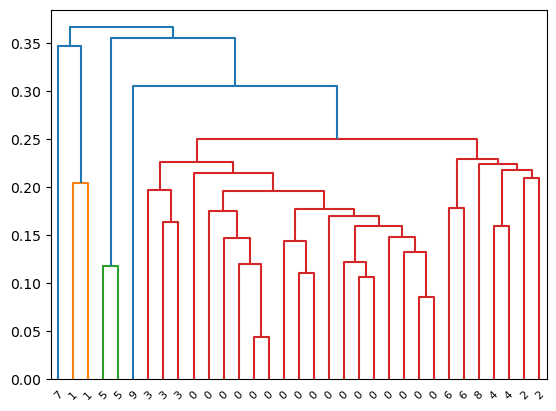

In [135]:


plot_dendrogram(model, truncate_mode="level", p=20, labels=model.labels_)

In [102]:
clustering

array([2, 4, 0, 0, 0, 0, 9, 1, 0, 0, 0, 6, 0, 1, 3, 0, 0, 6, 0, 0, 8, 3,
       2, 3, 0, 0, 0, 0, 0, 4, 7, 5, 5])

In [103]:
import umap
reducer = umap.UMAP(n_components=2)

features_2d = reducer.fit_transform(features)
features_2d.shape

(33, 2)

/var/folders/wr/dzqrxx290wdd7hsn7dnrjn3r0000gn/T/ipykernel_60578/2789482236.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(categories))


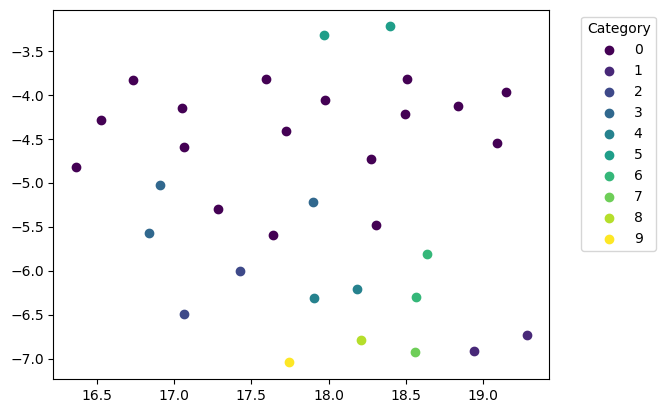

In [104]:
import matplotlib.pyplot as plt

# plt.scatter(features_2d[:, 0], features_2d[:, 1], c=clustering)

fig, ax = plt.subplots()

# Unique categories
categories = list(set(clustering))

# creating a color map
colors = plt.cm.get_cmap('viridis', len(categories))

for i, category in enumerate(categories):
    indicies = clustering == category
    ax.scatter(features_2d[indicies, 0], features_2d[indicies, 1], color=colors(i), label=category)

# Adding legend at the top right corner of the plot
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

In [105]:
list(zip(labels, clustering))

[('GCF_000014005', 2),
 ('GCF_000014905', 4),
 ('GCF_000022565', 0),
 ('GCF_000178955', 0),
 ('GCF_000178975', 0),
 ('GCF_000179915', 0),
 ('GCF_000226295', 9),
 ('GCF_000242615', 1),
 ('GCF_000265425', 0),
 ('GCF_000381585', 0),
 ('GCF_000381605', 0),
 ('GCF_000381625', 6),
 ('GCF_000421065', 0),
 ('GCF_000428885', 1),
 ('GCF_000620725', 3),
 ('GCF_000688455', 0),
 ('GCF_000688615', 0),
 ('GCF_000702445', 6),
 ('GCF_000745965', 0),
 ('GCF_000800015', 0),
 ('GCF_000820845', 8),
 ('GCF_001449115', 3),
 ('GCF_001618865', 2),
 ('GCF_003330725', 3),
 ('GCF_008000815', 0),
 ('GCF_014201365', 0),
 ('GCF_014203275', 0),
 ('GCF_014640335', 0),
 ('GCF_014642855', 0),
 ('GCF_015277775', 4),
 ('GCF_016592575', 7),
 ('GCF_900114625', 5),
 ('GCF_900188085', 5)]

In [108]:
from utils import scrape_org_taxonomy

URL_TEMPLATE = "https://biocyc.org/{ORGANISM_ID}/organism-summary"

org_names = []

for label in labels:
    print(label)
    org_names.append(scrape_org_taxonomy(URL_TEMPLATE.format(ORGANISM_ID = label)))

GCF_000014005
GCF_000014905
GCF_000022565
GCF_000178955
GCF_000178975
GCF_000179915
GCF_000226295
GCF_000242615
GCF_000265425
GCF_000381585
GCF_000381605
GCF_000381625
GCF_000421065
GCF_000428885
GCF_000620725
GCF_000688455
GCF_000688615
GCF_000702445
GCF_000745965
GCF_000800015
GCF_000820845
GCF_001449115
GCF_001618865
GCF_003330725
GCF_008000815
GCF_014201365
GCF_014203275
GCF_014640335
GCF_014642855
GCF_015277775
GCF_016592575
GCF_900114625
GCF_900188085


In [114]:
from collections import defaultdict

# Assuming your list of tuples is named `tuples_list`
# tuples_list = [('key1', 'value1'), ('key1', 'value2'), ('key2', 'value3'), ...]

result_dict = defaultdict(list)

for key, value in list(zip(clustering, org_names)):
    result_dict[key].append(value)

# transform defaultdict back into dict
result_dict = dict(result_dict)

In [124]:
result_dict[1]

[('Holophaga foetida',
  ['cellular organisms',
   'Bacteria <bacteria>',
   'Acidobacteriota',
   'Holophagae',
   'Holophagales',
   'Holophagaceae',
   'Holophaga',
   'Holophaga foetida',
   'Holophaga foetida DSM 6591']),
 ('Geothrix fermentans',
  ['cellular organisms',
   'Bacteria <bacteria>',
   'Acidobacteriota',
   'Holophagae',
   'Holophagales',
   'Holophagaceae',
   'Geothrix',
   'Geothrix fermentans',
   'Geothrix fermentans DSM 14018'])]